# Anti-Fraud Solution (Thunder ⚡ algorithm for fraud detection)

Anti-Fraud Solution

Sarah Rodrigues Garcia
Data Analyst – 1st Step of Hiring Process
Selection process for the Data Analyst position in Cloudwalk’s Risk Team

---------------------------------------------------------------------------
This project presents the development of an anti-fraud solution focused on payment systems. The main objective is to analyze transactional data, detect suspicious patterns, and build data-driven approaches to identify and mitigate fraudulent behaviors. By combining exploratory data analysis, feature engineering, and machine learning models, this solution seeks to enhance fraud detection efficiency while reducing false positives.

For the purposes of this project, I nicknamed the developed algorithm Thunder, symbolizing speed and impact identifying fraud within financial transactions.

The work represents the first step of the hiring process for the Data Analyst position at Cloudwalk, specifically in the Risk Team, demonstrating analytical skills, problem-solving capabilities, and applied knowledge of fraud prevention strategies in the payments industry.

**Disclaimer:**
Within the script, comments and annotations marked with hashtags (#) are written in Portuguese to better support my personal coding logic and workflow. However, all explanations, analyses, and documentation of the methods and results are provided in English to ensure clarity and accessibility for an international audience.

In [46]:
import pandas as pd

# URL do CSV
url = "https://gist.githubusercontent.com/cloudwalk-tests/76993838e65d7e0f988f40f1b1909c97/raw/295d9f7cb8fdf08f3cb3bdf1696ab245d5b5c1c9/transactional-sample.csv"

# Ler CSV
df = pd.read_csv(url)

# Visualizar as primeiras linhas
df.head()


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


# Pre-Treatment

Handle missing values (removal, replacement with mean, median, or specific values).

Remove duplicates, rows, or repeated records. (I will not remove duplicates because they will help indicate frauds).

Correct inconsistencies, such as date formats, data types, or category names.


In [47]:
# Mostrar a quantidade de valores nulos por coluna
print(df.isnull().sum())

# Mostrar se há algum valor nulo no DataFrame
print(df.isnull().any())

# Opcional: exibir todas as linhas que possuem pelo menos um valor nulo
df_nulls = df[df.isnull().any(axis=1)]
df_nulls


transaction_id          0
merchant_id             0
user_id                 0
card_number             0
transaction_date        0
transaction_amount      0
device_id             830
has_cbk                 0
dtype: int64
transaction_id        False
merchant_id           False
user_id               False
card_number           False
transaction_date      False
transaction_amount    False
device_id              True
has_cbk               False
dtype: bool


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
18,21320416,97583,6434,498401******3796,2019-12-01T19:56:26.207496,396.84,NaN,False
21,21320419,3788,18009,550209******5149,2019-12-01T19:44:40.414039,296.27,NaN,False
32,21320430,56977,69758,464296******3991,2019-12-01T19:17:21.731168,2803.32,NaN,True
...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,2019-11-01T13:05:34.054967,744.15,NaN,False
3195,21323593,9603,59275,528052******3611,2019-11-01T11:47:02.404963,1403.67,NaN,False
3196,21323594,57997,84486,522688******9874,2019-11-01T10:23:50.555604,1.55,NaN,False
3197,21323595,35930,7,544315******7773,2019-11-01T01:29:45.799767,359.68,NaN,False


In [48]:
# Importar pandas
import pandas as pd

# Moda do device_id
moda_device = df['device_id'].mode()[0]
print("Moda do device_id:", moda_device)


Moda do device_id: 563499.0


In [49]:
# Porcentagem de cada device_id
device_percent = df['device_id'].value_counts(normalize=True) * 100
print(device_percent)


device_id
563499.0    0.928662
342890.0    0.802026
101848.0    0.717602
438940.0    0.590967
547440.0    0.548755
              ...   
312720.0    0.042212
867567.0    0.042212
894628.0    0.042212
449907.0    0.042212
931056.0    0.042212
Name: proportion, Length: 1996, dtype: float64


In [50]:
# Preencher valores nulos na coluna device_id com a moda
df['device_id'] = df['device_id'].fillna(df['device_id'].mode()[0])

In [51]:
# Mostrar a quantidade de valores nulos por coluna
print(df.isnull().sum())

# Mostrar se há algum valor nulo no DataFrame
print(df.isnull().any())

# Opcional: exibir todas as linhas que possuem pelo menos um valor nulo
df_nulls = df[df.isnull().any(axis=1)]
df_nulls

transaction_id        0
merchant_id           0
user_id               0
card_number           0
transaction_date      0
transaction_amount    0
device_id             0
has_cbk               0
dtype: int64
transaction_id        False
merchant_id           False
user_id               False
card_number           False
transaction_date      False
transaction_amount    False
device_id             False
has_cbk               False
dtype: bool


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk


In [52]:
import pandas as pd

# Converter para datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# Verificar se existem valores que não puderam ser convertidos
nulos = df['transaction_date'].isnull().sum()
print("Número de datas inválidas ou nulas após conversão:", nulos)



Número de datas inválidas ou nulas após conversão: 0


In [53]:
# Ver os tipos de dados de cada coluna
print(df.dtypes)

transaction_id                 int64
merchant_id                    int64
user_id                        int64
card_number                   object
transaction_date      datetime64[ns]
transaction_amount           float64
device_id                    float64
has_cbk                         bool
dtype: object


In [54]:
# Salvar o DataFrame atualizado em um novo arquivo CSV
df.to_csv('transactional_sample_clean.csv', index=False)

# Analytics Starts

Detection of suspicious behaviors.

In [55]:
import pandas as pd

# Abrir o CSV salvo
df_clean = pd.read_csv('transactional_sample_clean.csv')

# Visualizar as primeiras linhas
df_clean.head()


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,563499.0,False
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,563499.0,True
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.0,False


Duplicate Transactions

In [56]:
import pandas as pd

# Abrir o CSV salvo
df_clean = pd.read_csv('transactional_sample_clean.csv')

# Visualizar as primeiras linhas
print(df_clean.head())

# Criar coluna de duplicatas em transaction_id
df_clean['dup_transaction'] = df_clean['transaction_id'].duplicated(keep=False).astype(int)

# Conferir resultado
print(df_clean[['transaction_id', 'dup_transaction']].head(20))

# Verificar se todos os transaction_id são únicos
all_unique = df_clean['transaction_id'].is_unique
print("Todos os transaction_id são únicos?", all_unique)

# Verificar unicidade em outras colunas
print("Todos os merchant_id são únicos?", df_clean['merchant_id'].is_unique)
print("Todos os user_id são únicos?", df_clean['user_id'].is_unique)

   transaction_id  merchant_id  user_id       card_number  \
0        21320398        29744    97051  434505******9116   
1        21320399        92895     2708  444456******4210   
2        21320400        47759    14777  425850******7024   
3        21320401        68657    69758  464296******3991   
4        21320402        54075    64367  650487******6116   

             transaction_date  transaction_amount  device_id  has_cbk  
0  2019-12-01 23:16:32.812632              374.56   285475.0    False  
1  2019-12-01 22:45:37.873639              734.87   497105.0     True  
2  2019-12-01 22:22:43.021495              760.36   563499.0    False  
3  2019-12-01 21:59:19.797129             2556.13   563499.0     True  
4  2019-12-01 21:30:53.347051               55.36   860232.0    False  
    transaction_id  dup_transaction
0         21320398                0
1         21320399                0
2         21320400                0
3         21320401                0
4         21320402   

"Since there are no data supporting the hypothesis of fraud through transaction_id duplication, I will not pursue this hypothesis further in my study, due to the lack of reliable evidence and the non-replicable nature of this behavior."

Chargeback Count Evaluation x Total Transactions per Merchant

In [57]:
import pandas as pd

# Abrir o CSV limpo (caso ainda não tenha aberto)
df_clean = pd.read_csv('transactional_sample_clean.csv')

# Agrupar por merchant_id e somar os chargebacks
chargebacks_per_merchant = df_clean.groupby('merchant_id')['has_cbk'].sum().reset_index()

# Renomear a coluna para ficar mais claro
chargebacks_per_merchant.rename(columns={'has_cbk': 'chargeback_count'}, inplace=True)

# Ordenar do maior para o menor número de chargebacks
chargebacks_per_merchant = chargebacks_per_merchant.sort_values(by='chargeback_count', ascending=False)

# Mostrar resultado
print(chargebacks_per_merchant.head(10))  # top 10 merchants com mais chargebacks


      merchant_id  chargeback_count
339         17275                22
77           4705                19
20           1308                15
960         53041                14
1360        77130                13
1622        91972                11
830         44927                11
1309        73271                10
542         29214                 9
1004        55854                 9


In [58]:
import pandas as pd

# Abrir CSV limpo
df_clean = pd.read_csv('transactional_sample_clean.csv')

# -------------------------------
# 1️⃣ Total de chargebacks por merchant
# -------------------------------
chargebacks_per_merchant = df_clean.groupby('merchant_id')['has_cbk'].sum().reset_index()
chargebacks_per_merchant.rename(columns={'has_cbk': 'chargeback_count'}, inplace=True)

# Ordenar do maior para o menor número de chargebacks
chargebacks_per_merchant = chargebacks_per_merchant.sort_values(by='chargeback_count', ascending=False)

# Selecionar top 10 merchants com mais chargebacks
top10_merchants = chargebacks_per_merchant.head(10)

# -------------------------------
# 2️⃣ Total de vendas desses top 10 merchants
# -------------------------------
total_vendas_top10 = df_clean[df_clean['merchant_id'].isin(top10_merchants['merchant_id'])]
total_vendas_per_merchant = total_vendas_top10.groupby('merchant_id')['transaction_id'].count().reset_index()
total_vendas_per_merchant.rename(columns={'transaction_id': 'total_transactions'}, inplace=True)

# -------------------------------
# 3️⃣ Juntar chargebacks e total de vendas
# -------------------------------
top10_stats = pd.merge(top10_merchants, total_vendas_per_merchant, on='merchant_id')

# -------------------------------
# 4️⃣ Visualizar resultado
# -------------------------------
print(top10_stats)


   merchant_id  chargeback_count  total_transactions
0        17275                22                  30
1         4705                19                  22
2         1308                15                  15
3        53041                14                  19
4        77130                13                  15
5        91972                11                  14
6        44927                11                  11
7        73271                10                  10
8        29214                 9                  10
9        55854                 9                  11


In [59]:
import pandas as pd

# -------------------------------
# 1️⃣ Abrir o CSV limpo
# -------------------------------
df_clean = pd.read_csv('transactional_sample_clean.csv')

# -------------------------------
# 2️⃣ Total de chargebacks por merchant
# -------------------------------
chargebacks_per_merchant = df_clean.groupby('merchant_id')['has_cbk'].sum().reset_index()
chargebacks_per_merchant.rename(columns={'has_cbk': 'chargeback_count'}, inplace=True)

# -------------------------------
# 3️⃣ Total de transações por merchant
# -------------------------------
total_vendas_per_merchant = df_clean.groupby('merchant_id')['transaction_id'].count().reset_index()
total_vendas_per_merchant.rename(columns={'transaction_id': 'total_transactions'}, inplace=True)

# -------------------------------
# 4️⃣ Combinar chargebacks e total de vendas
# -------------------------------
merchant_stats = pd.merge(chargebacks_per_merchant, total_vendas_per_merchant, on='merchant_id')

# -------------------------------
# 5️⃣ Calcular taxa de chargeback
# -------------------------------
merchant_stats['chargeback_rate'] = merchant_stats['chargeback_count'] / merchant_stats['total_transactions']

# -------------------------------
# 6️⃣ Definir limite da taxa de chargeback (1%)
# -------------------------------
taxa_chargeback = 1 / 100  # 1%

# Selecionar merchants suspeitos
merchants_suspeitos = merchant_stats[merchant_stats['chargeback_rate'] > taxa_chargeback]['merchant_id'].tolist()

# -------------------------------
# 7️⃣ Atualizar coluna 'chargeback_fraud' no DataFrame original
# -------------------------------
df_clean['chargeback_fraud'] = 0  # inicializa com 0
df_clean.loc[df_clean['merchant_id'].isin(merchants_suspeitos), 'chargeback_fraud'] = 1

# -------------------------------
# 8️⃣ Visualizar top 10 linhas marcadas como fraude
# -------------------------------
print(df_clean[df_clean['chargeback_fraud'] == 1].head(10))

# -------------------------------
# 9️⃣ (Opcional) Salvar o DataFrame atualizado em CSV
# -------------------------------
df_clean.to_csv('transactional_sample_clean_fraud1.csv', index=False)
print("DataFrame atualizado salvo em 'transactional_sample_clean_fraud1.csv'")


    transaction_id  merchant_id  user_id       card_number  \
0         21320398        29744    97051  434505******9116   
1         21320399        92895     2708  444456******4210   
3         21320401        68657    69758  464296******3991   
7         21320405        56107    81152  650516******9201   
8         21320406        56107    81152  650516******9201   
9         21320407        56107    81152  650516******9201   
13        21320411        56107    81152  650516******7004   
15        21320413        56107    81669  530033******7110   
26        21320424        53816     5541  606282******3381   
28        21320426        11470     5541  606282******3381   

              transaction_date  transaction_amount  device_id  has_cbk  \
0   2019-12-01 23:16:32.812632              374.56   285475.0    False   
1   2019-12-01 22:45:37.873639              734.87   497105.0     True   
3   2019-12-01 21:59:19.797129             2556.13   563499.0     True   
7   2019-12-01 21:24:

Transactions with Suspicious Values

In [60]:
import pandas as pd

# Abrir CSV limpo
df_clean = pd.read_csv('transactional_sample_clean_fraud1.csv')

# Ordenar as transações pelo maior valor de transaction_amount
maiores_valores = df_clean.sort_values(by='transaction_amount', ascending=False)

# Mostrar as 10 transações com maior valor
print(maiores_valores[['transaction_id', 'merchant_id', 'transaction_amount']].head(10))


      transaction_id  merchant_id  transaction_amount
2516        21322914        49919             4097.21
1713        21322111        75917             4095.82
2550        21322948        17304             4091.83
2651        21323049        49919             4089.88
1277        21321675        65330             4089.73
920         21321318        18493             4080.03
684         21321082        15676             4078.80
1707        21322105        65330             4077.47
2776        21323174        36929             4077.07
1293        21321691        65330             4076.40


In [61]:
import pandas as pd
import plotly.express as px

# Abrir CSV limpo
df_clean = pd.read_csv('transactional_sample_clean_fraud1.csv')

# Criar boxplot interativo do transaction_amount
fig = px.box(df_clean,
             y='transaction_amount',
             points='all',  # mostra todos os pontos como scatter
             title='Boxplot de Transaction Amount',
             labels={'transaction_amount': 'Transaction Amount'})

# Mostrar gráfico
fig.show()



In [62]:
import pandas as pd

# -------------------------------
# 1️⃣ Abrir o CSV limpo
# -------------------------------
df_clean = pd.read_csv('transactional_sample_clean_fraud1.csv')

# -------------------------------
# 2️⃣ Calcular Q1, Q3 e IQR
# -------------------------------
Q1 = df_clean['transaction_amount'].quantile(0.25)
Q3 = df_clean['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR

print(f"Upper fence (limite superior) para outliers: {upper_fence}")

# -------------------------------
# 3️⃣ Criar/atualizar coluna 'fraud_upper_fence'
# -------------------------------
# Se a coluna não existir ainda, inicializa com 0
if 'fraud_upper_fence' not in df_clean.columns:
    df_clean['fraud_upper_fence'] = 0

# Marcar como fraude (1) todas as transações acima do upper fence
df_clean.loc[df_clean['transaction_amount'] > upper_fence, 'fraud_upper_fence'] = 1

# -------------------------------
# 4️⃣ Verificar top 10 transações marcadas
# -------------------------------
print(
    df_clean[df_clean['fraud_upper_fence'] == 1]
    .sort_values(by='transaction_amount', ascending=False)
    .head(10)
)

# -------------------------------
# 5️⃣ (Opcional) Salvar DataFrame atualizado
# -------------------------------
df_clean.to_csv('transactional_sample_clean_fraud2.csv', index=False)
print("DataFrame atualizado salvo em 'transactional_sample_clean_fraud2.csv'")


Upper fence (limite superior) para outliers: 2146.3475
      transaction_id  merchant_id  user_id       card_number  \
2516        21322914        49919    78262  498401******7580   
1713        21322111        75917    17929  606282******5292   
2550        21322948        17304    31561  651653******2797   
2651        21323049        49919    78262  514868******3935   
1277        21321675        65330    78262  553636******6301   
920         21321318        18493    75771  444458******3957   
684         21321082        15676    54976  439354******6004   
1707        21322105        65330    78262  553636******6676   
2776        21323174        36929    49106  464611******5820   
1293        21321691        65330    78262  553636******4313   

                transaction_date  transaction_amount  device_id  has_cbk  \
2516  2019-11-17 18:55:48.472161             4097.21   547440.0     True   
1713  2019-11-22 22:43:08.863484             4095.82   960729.0     True   
2550  2019-1

Transactions at Unusual Hours or in Rapid Sequence with the Same Card & Creation of the Regular Column

In [63]:
import pandas as pd

# -------------------------------
# 1) Abrir o CSV (exemplo com o seu DataFrame já carregado)
# -------------------------------
df_clean = pd.read_csv("transactional_sample_clean_fraud2.csv")

# Garantir que transaction_date é datetime
df_clean['transaction_date'] = pd.to_datetime(df_clean['transaction_date'])

# -------------------------------
# 2) Criar coluna para horários incomuns
# -------------------------------
# Define horário incomum = entre 00h e 06h
df_clean['fraud_unusual_hour'] = df_clean['transaction_date'].dt.hour.apply(lambda x: 1 if 0 <= x <= 6 else 0)

# -------------------------------
# 3) Criar coluna para transações muito próximas (mesmo cartão)
# -------------------------------
# Ordenar por cartão e data
df_clean = df_clean.sort_values(by=['card_number', 'transaction_date'])

# Calcular diferença de tempo entre transações consecutivas do mesmo cartão
df_clean['time_diff'] = df_clean.groupby('card_number')['transaction_date'].diff().dt.total_seconds()

# Criar flag: 1 se a diferença for menor que 60 segundos (ajuste conforme necessidade)
df_clean['fraud_fast_sequence'] = df_clean['time_diff'].apply(lambda x: 1 if pd.notnull(x) and x < 60 else 0)

# -------------------------------
# 4) Visualizar transações suspeitas
# -------------------------------
print("\nTransações em horários incomuns:")
print(df_clean[df_clean['fraud_unusual_hour'] == 1].head(10))

print("\nTransações em sequência rápida:")
print(df_clean[df_clean['fraud_fast_sequence'] == 1].head(10))

# -------------------------------
# 5) Coluna regular (não apresenta fraude nenhuma)
# -------------------------------
df_clean['regular'] = (
    (df_clean['chargeback_fraud'] == 0) &
    (df_clean['fraud_upper_fence'] == 0) &
    (df_clean['fraud_unusual_hour'] == 0) &
    (df_clean['fraud_fast_sequence'] == 0)
).astype(int)  # converte True/False para 1/0

# -------------------------------
# 6) Salvar DataFrame final
# -------------------------------
df_clean.to_csv("transactional_sample_fraud_final.csv", index=False)
print("✅ DataFrame final salvo em 'transactional_sample_fraud_final.csv'")




Transações em horários incomuns:
      transaction_id  merchant_id  user_id       card_number  \
2031        21322429        50897    90123  230650******1271   
435         21320833        52088    30248  230744******6644   
3067        21323465         9842    37176  230744******9009   
2360        21322758        67952    62572   404024******820   
149         21320547         7147    70568  404024******8474   
1667        21322065        61935    81705  406168******2973   
150         21320548        67928     3020  406441******3381   
1656        21322054        39253    67519  406655******3711   
1663        21322061        39253    67519  406655******4190   
2042        21322440        13772    79445  406655******4424   

               transaction_date  transaction_amount  device_id  has_cbk  \
2031 2019-11-22 00:52:08.501289               20.77   810633.0    False   
435  2019-11-30 00:01:02.379395               10.17   420875.0    False   
3067 2019-11-05 00:40:05.815685     

In [64]:
import pandas as pd

# Abrir o CSV final com todas as colunas de fraude
df = pd.read_csv("transactional_sample_fraud_final.csv")

# Mostrar as primeiras linhas do DataFrame
print(df.head())

# Mostrar todas as colunas
print("\nColunas do DataFrame:")
print(df.columns)


   transaction_id  merchant_id  user_id       card_number  \
0        21322636        87176    53512  222763******3026   
1        21322487        16584    49891  222763******3031   
2        21322854        49205    85112  230540******1680   
3        21323080        54433    71812  230540******6285   
4        21321787        10213    95699  230650******1206   

             transaction_date  transaction_amount  device_id  has_cbk  \
0  2019-11-20 18:28:22.717159             1381.81   231308.0    False   
1  2019-11-21 21:04:06.011576             1922.95   862812.0    False   
2  2019-11-18 14:40:59.900580              248.98   286168.0    False   
3  2019-11-14 21:01:36.665974              154.91    24654.0    False   
4  2019-11-23 21:34:03.184442              301.13   563499.0    False   

   chargeback_fraud  fraud_upper_fence  fraud_unusual_hour  time_diff  \
0                 0                  0                   0        NaN   
1                 0                  0          

# ML Workflow Start | Training and Testing Data Split

🔹 Recommended Percentages

Training: 70% to 80%

Testing: 20% to 30%

Common Example:

Training = 70%

Testing = 30%

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Abrir CSV final
df = pd.read_csv("transactional_sample_fraud_final.csv")

# Dividir o DataFrame em treino (70%) e teste (30%)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Conferir tamanhos
print(f"Tamanho df_train: {df_train.shape}")
print(f"Tamanho df_test: {df_test.shape}")

# Salvar em CSV (opcional)
df_train.to_csv("train_dataset.csv", index=False)
df_test.to_csv("test_dataset.csv", index=False)
print("✅ Base de treino e teste salvas em CSV")



Tamanho df_train: (2239, 14)
Tamanho df_test: (960, 14)
✅ Base de treino e teste salvas em CSV


In [66]:
import pandas as pd

# Abrir a base de treino
df_train = pd.read_csv("train_dataset.csv")

# Mostrar as primeiras linhas
print("Primeiras linhas da base de treino:")
print(df_train.head())

# Mostrar todas as colunas
print("\nColunas da base de treino:")
print(df_train.columns)

# Conferir dimensões
print(f"\nNúmero de linhas e colunas: {df_train.shape}")



Primeiras linhas da base de treino:
   transaction_id  merchant_id  user_id       card_number  \
0        21323143         2800    12200  544731******5694   
1        21321217        52464    85649  535016******7513   
2        21322776        35930    20839  498442******6165   
3        21321755        78105    47634  410863******7167   
4        21320502        44870    66026  514087******2029   

             transaction_date  transaction_amount  device_id  has_cbk  \
0  2019-11-12 12:55:54.063447              545.77   563499.0    False   
1  2019-11-28 21:07:07.798770               87.85   173431.0    False   
2  2019-11-18 21:04:42.532616              769.38   563499.0    False   
3  2019-11-23 23:49:29.206809              271.63    79039.0    False   
4  2019-12-01 13:50:44.957978             1145.76   238516.0    False   

   chargeback_fraud  fraud_upper_fence  fraud_unusual_hour  time_diff  \
0                 0                  0                   0        NaN   
1           

In [67]:
import pandas as pd
import plotly.express as px

# Abrir a base de treino
df_train = pd.read_csv("train_dataset.csv")

# Colunas de interesse
cols = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
        'fraud_fast_sequence', 'regular']

# Contar quantos 1s em cada coluna
fraud_counts = df_train[cols].sum().reset_index()
fraud_counts.columns = ['Fraud_Type', 'Count']

# Criar gráfico de barras interativo
fig = px.bar(
    fraud_counts,
    x='Fraud_Type',
    y='Count',
    color='Count',
    color_continuous_scale='Blues',
    title="Quantidade de transações marcadas em cada coluna de fraude / regular",
    text='Count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Tipo de Fraude / Regular",
    yaxis_title="Número de Transações",
    coloraxis_showscale=False
)

fig.show()


In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC

# ===============================
# 1️⃣ Abrir dataset de treino
# ===============================
df_train = pd.read_csv("train_dataset.csv")

# Colunas de fraude/target
cols_target = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
               'fraud_fast_sequence', 'regular']

# Colunas categóricas que precisam ser codificadas para SMOTENC
cat_cols = ['transaction_id', 'merchant_id', 'user_id', 'card_number', 'device_id', 'has_cbk']

# Criar codificadores
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

# Colunas numéricas contínuas
num_cols = ['transaction_amount']  # você pode adicionar outras se houver

# ===============================
# 2️⃣ Definir target_count específico por rótulo
# ===============================
target_counts = {
    'chargeback_fraud': 1561,
    'fraud_upper_fence': 500,
    'fraud_unusual_hour': 300,
    'fraud_fast_sequence': 100,
    'regular': 0  # não vamos oversamplear
}

df_resampled_list = []

# ===============================
# 3️⃣ Aplicar SMOTENC por rótulo
# ===============================
for col in cols_target:
    print(f"Processing label: {col}")

    y = df_train[col]
    X = df_train[num_cols + cat_cols]

    n_positive = y.sum()
    target_count_col = target_counts[col]

    # Se não precisa aumentar, pular
    if target_count_col <= n_positive:
        print(f"Skipping {col}, already has {n_positive} positives >= target {target_count_col}")
        continue

    cat_indices = [X.columns.get_loc(c) for c in cat_cols]

    smote = SMOTENC(
        categorical_features=cat_indices,
        sampling_strategy={1: target_count_col},
        random_state=42
    )
    X_res, y_res = smote.fit_resample(X, y)

    # Criar DataFrame resampleado
    df_resampled_col = pd.DataFrame(X_res, columns=num_cols + cat_cols)
    df_resampled_col[col] = y_res

    # Manter outros rótulos originais quando possível
    for other_col in cols_target:
        if other_col != col:
            original_indices = df_train.index[:len(df_resampled_col)]
            df_resampled_col[other_col] = df_train.loc[original_indices, other_col].reindex(df_resampled_col.index, fill_value=0)

    # Duplicar transaction_date correspondente aos positivos
    positive_indices = y_res[y_res == 1].index
    df_resampled_col.loc[positive_indices, 'transaction_date'] = df_train.loc[positive_indices % len(df_train), 'transaction_date'].values
    df_resampled_col['time_diff'] = np.nan  # recalcular depois

    df_resampled_list.append(df_resampled_col)

# ===============================
# 4️⃣ Concatenar todos os registros balanceados
# ===============================
df_resampled = pd.concat(df_resampled_list, ignore_index=True)

# ===============================
# 5️⃣ Reverter label encoding das categóricas (opcional)
# ===============================
for col in cat_cols:
    le = label_encoders[col]
    df_resampled[col] = le.inverse_transform(df_resampled[col].astype(int))

# ===============================
# 6️⃣ Salvar dataset final para ML
# ===============================
df_resampled.to_csv("train_dataset_SMOTE_balanced.csv", index=False)
print("✅ Dataset balanceado com SMOTE salvo em 'train_dataset_SMOTE_balanced.csv'")

# Conferir contagem de positivos em cada coluna
for col in cols_target:
    print(f"{col}:\n{df_resampled[col].value_counts()}\n")

# Conferir colunas
print("\nColunas do dataset final:")
print(df_resampled.columns.tolist())


Processing label: chargeback_fraud
Processing label: fraud_upper_fence
Processing label: fraud_unusual_hour
Processing label: fraud_fast_sequence
Processing label: regular
Skipping regular, already has 1561 positives >= target 0
✅ Dataset balanceado com SMOTE salvo em 'train_dataset_SMOTE_balanced.csv'
chargeback_fraud:
chargeback_fraud
0    7918
1    2665
Name: count, dtype: int64

fraud_upper_fence:
fraud_upper_fence
0    9438
1    1145
Name: count, dtype: int64

fraud_unusual_hour:
fraud_unusual_hour
0    9566
1    1017
Name: count, dtype: int64

fraud_fast_sequence:
fraud_fast_sequence
0    10447
1      136
Name: count, dtype: int64

regular:
regular
1    6244
0    4339
Name: count, dtype: int64


Colunas do dataset final:
['transaction_amount', 'transaction_id', 'merchant_id', 'user_id', 'card_number', 'device_id', 'has_cbk', 'chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour', 'fraud_fast_sequence', 'regular', 'transaction_date', 'time_diff']


In [69]:
import plotly.express as px
import pandas as pd

# Abrir dataset balanceado com SMOTE
df_resampled = pd.read_csv("train_dataset_SMOTE_balanced.csv")

# Colunas de fraude/regular
cols_fraude = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
               'fraud_fast_sequence', 'regular']

# Contar número de registros positivos (1) em cada coluna
counts = df_resampled[cols_fraude].sum().reset_index()
counts.columns = ['Fraud_Type', 'Count']

# Criar gráfico de barras interativo
fig = px.bar(
    counts,
    x='Fraud_Type',
    y='Count',
    color='Count',
    color_continuous_scale='Blues',
    text='Count',
    title="Incidência de 1s em cada coluna de fraude / regular no dataset SMOTE"
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Tipo de Fraude / Regular",
    yaxis_title="Número de Registros Positivos (1)",
    coloraxis_showscale=False
)

fig.show()




In [70]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Abrir dataframe de treino
df_train = pd.read_csv("train_dataset_SMOTE_balanced.csv")

# --- Transformar coluna de data em features numéricas ---
df_train['transaction_date'] = pd.to_datetime(df_train['transaction_date'])
df_train['hour'] = df_train['transaction_date'].dt.hour          # hora do dia
df_train['minute'] = df_train['transaction_date'].dt.minute      # minuto
df_train['second'] = df_train['transaction_date'].dt.second      # segundo
df_train['day_of_week'] = df_train['transaction_date'].dt.dayofweek  # segunda=0, domingo=6
df_train['is_weekend'] = df_train['day_of_week'].isin([5,6]).astype(int)  # fim de semana
df_train['timestamp'] = df_train['transaction_date'].view('int64') // 10**9  # segundos desde 1970

# Opcional: remover a coluna original de data
df_train = df_train.drop(columns=['transaction_date'])

# --- Codificar variáveis categóricas (strings) ---
for col in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])

# Definir colunas de target
cols_fraude = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
               'fraud_fast_sequence', 'regular']

# Separar X (features) e y (targets)
X = df_train.drop(columns=cols_fraude)  # todas as outras colunas são features
y = df_train[cols_fraude]               # variáveis alvo

# Conferir shapes
print("Shape de X (features):", X.shape)
print("Shape de y (targets):", y.shape)

# Visualizar primeiras linhas
print("\nFeatures (X):")
print(X.head())
print("\nTargets (y):")
print(y.head())



Shape de X (features): (10583, 14)
Shape de y (targets): (10583, 5)

Features (X):
   transaction_amount  transaction_id  merchant_id  user_id  card_number  \
0              545.77        21323143         2800    12200         1524   
1               87.85        21321217        52464    85649         1308   
2              769.38        21322776        35930    20839          685   
3              271.63        21321755        78105    47634          157   
4             1145.76        21320502        44870    66026          784   

   device_id  has_cbk  time_diff  hour  minute  second  day_of_week  \
0   563499.0    False        NaN   NaN     NaN     NaN          NaN   
1   173431.0    False        NaN   NaN     NaN     NaN          NaN   
2   563499.0    False        NaN   NaN     NaN     NaN          NaN   
3    79039.0    False        NaN   NaN     NaN     NaN          NaN   
4   238516.0    False        NaN   NaN     NaN     NaN          NaN   

   is_weekend   timestamp  
0    

/tmp/ipython-input-3501874602.py:14: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



# Models for Multi-Label Classification

Random Forest / Gradient Boosting

Can be used with MultiOutputClassifier from scikit-learn to handle multiple target columns.

In [71]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# ================================
# 1️⃣ Abrir dataset de treino
# ================================
df_train = pd.read_csv("train_dataset_SMOTE_balanced.csv")

# ================================
# 2️⃣ Definir colunas de target
# ================================
cols_fraude = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
               'fraud_fast_sequence', 'regular']

# ================================
# 3️⃣ Separar features (X) e targets (y)
# ================================
X = df_train.drop(columns=cols_fraude)
y = df_train[cols_fraude]

# ================================
# 4️⃣ Tratar colunas categóricas e datetime
# ================================
cat_cols = ['transaction_id', 'merchant_id', 'user_id', 'card_number', 'device_id', 'has_cbk']

X_encoded = X.copy()
label_encoders = {}

# Transformar coluna datetime em timestamp numérico
if 'transaction_date' in X_encoded.columns:
    X_encoded['transaction_date'] = pd.to_datetime(X_encoded['transaction_date'])
    X_encoded['transaction_date'] = X_encoded['transaction_date'].astype(int) / 10**9  # segundos desde epoch

# Label encoding das categóricas
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# ================================
# 5️⃣ Treinamento do Random Forest Multi-Output
# ================================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_rf = MultiOutputClassifier(rf)

multi_rf.fit(X_encoded, y)

print("✅ Treinamento concluído com sucesso!")




✅ Treinamento concluído com sucesso!


In [72]:
# ================================
# 1️⃣ Abrir dataset de teste
# ================================
df_test = pd.read_csv("test_dataset.csv")

# Separar features e targets
X_test = df_test.drop(columns=cols_fraude)
y_test = df_test[cols_fraude]

# ================================
# 2️⃣ Pré-processar colunas categóricas e datetime
# ================================
X_test_encoded = X_test.copy()

# Transformar coluna datetime em timestamp numérico
if 'transaction_date' in X_test_encoded.columns:
    X_test_encoded['transaction_date'] = pd.to_datetime(X_test_encoded['transaction_date'])
    X_test_encoded['transaction_date'] = X_test_encoded['transaction_date'].view('int64') // 10**9  # segundos desde epoch

# Label encoding das categóricas usando encoders do treino
for col in cat_cols:
    le = label_encoders[col]
    # Transformar valores desconhecidos como -1
    X_test_encoded[col] = X_test_encoded[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Garantir que todas as colunas do teste existam e estejam na mesma ordem do treino
for col in X_encoded.columns:
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0  # criar coluna faltante com zeros

X_test_encoded = X_test_encoded[X_encoded.columns]  # reorganizar ordem das colunas

# ================================
# 3️⃣ Predição com o modelo treinado
# ================================
y_pred = multi_rf.predict(X_test_encoded)

# Converter para DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=cols_fraude)

print("✅ Predição concluída!")
print(y_pred_df.head())



/tmp/ipython-input-577356374.py:18: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



✅ Predição concluída!
   chargeback_fraud  fraud_upper_fence  fraud_unusual_hour  \
0                 1                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 0                  0                   0   

   fraud_fast_sequence  regular  
0                    0        0  
1                    0        0  
2                    0        0  
3                    0        0  
4                    0        0  


#Evaluation of the model's performance appropriately for a multi-label fraud problem.

=== Acurácia por rótulo ===
chargeback_fraud: 0.8677
fraud_upper_fence: 0.9865
fraud_unusual_hour: 0.8885
fraud_fast_sequence: 0.9469
regular: 0.3115


=== Classification Report ===
                     precision    recall  f1-score   support

   chargeback_fraud       0.59      0.75      0.66       164
  fraud_upper_fence       1.00      0.84      0.91        82
 fraud_unusual_hour       1.00      0.02      0.04       109
fraud_fast_sequence       0.00      0.00      0.00         5
            regular       0.00      0.00      0.00       661

          micro avg       0.60      0.19      0.29      1021
          macro avg       0.52      0.32      0.32      1021
       weighted avg       0.28      0.19      0.18      1021
        samples avg       0.19      0.17      0.17      1021

=== Métricas globais ===
F1-score (macro): 0.3219, Precision (macro): 0.5177, Recall (macro): 0.3220
F1-score (micro): 0.2880, Precision (micro): 0.5951, Recall (micro): 0.1900




/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



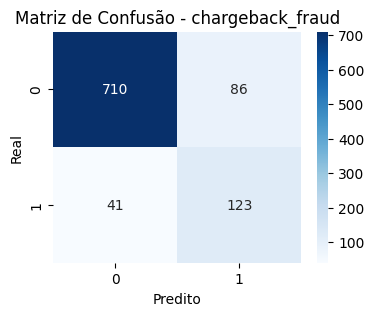

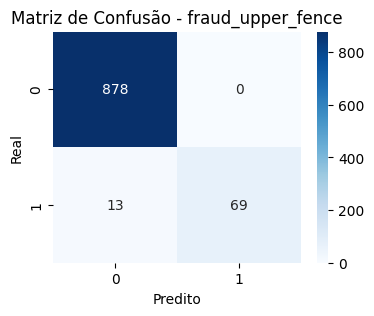

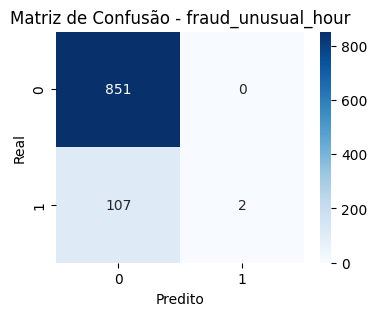

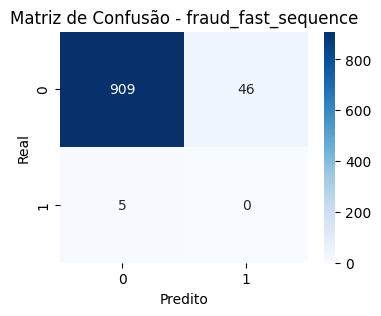

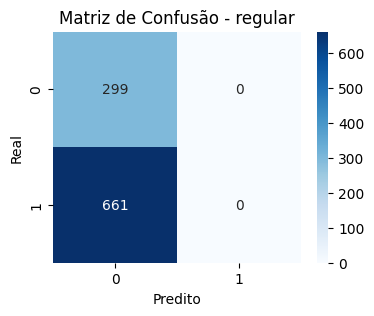

In [73]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# 1️⃣ Acurácia por rótulo
# ================================
print("=== Acurácia por rótulo ===")
for col in cols_fraude:
    acc = accuracy_score(y_test[col], y_pred_df[col])
    print(f"{col}: {acc:.4f}")
print("\n")

# ================================
# 2️⃣ Relatório detalhado de classificação (precision, recall, F1)
# ================================
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_df, target_names=cols_fraude))

# ================================
# 3️⃣ Métricas globais multi-label (macro e micro)
# ================================
f1_macro = f1_score(y_test, y_pred_df, average='macro')
precision_macro = precision_score(y_test, y_pred_df, average='macro')
recall_macro = recall_score(y_test, y_pred_df, average='macro')

f1_micro = f1_score(y_test, y_pred_df, average='micro')
precision_micro = precision_score(y_test, y_pred_df, average='micro')
recall_micro = recall_score(y_test, y_pred_df, average='micro')

print("=== Métricas globais ===")
print(f"F1-score (macro): {f1_macro:.4f}, Precision (macro): {precision_macro:.4f}, Recall (macro): {recall_macro:.4f}")
print(f"F1-score (micro): {f1_micro:.4f}, Precision (micro): {precision_micro:.4f}, Recall (micro): {recall_micro:.4f}")
print("\n")

# ================================
# 4️⃣ Matrizes de confusão por rótulo
# ================================
for col in cols_fraude:
    cm = confusion_matrix(y_test[col], y_pred_df[col])
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {col}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()


In [74]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

# ================================
# 1️⃣ Abrir dataset de treino
# ================================
df_train = pd.read_csv("train_dataset_SMOTE_balanced.csv")

# ================================
# 2️⃣ Definir colunas de target
# ================================
cols_fraude = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
               'fraud_fast_sequence', 'regular']

# ================================
# 3️⃣ Separar features (X) e targets (y)
# ================================
X = df_train.drop(columns=cols_fraude)
y = df_train[cols_fraude]

# ================================
# 4️⃣ Tratar colunas categóricas e datetime
# ================================
cat_cols = ['transaction_id', 'merchant_id', 'user_id', 'card_number', 'device_id', 'has_cbk']

X_encoded = X.copy()
label_encoders = {}

# Transformar coluna datetime em timestamp numérico
if 'transaction_date' in X_encoded.columns:
    X_encoded['transaction_date'] = pd.to_datetime(X_encoded['transaction_date'])
    X_encoded['transaction_date'] = X_encoded['transaction_date'].view('int64') // 10**9  # segundos desde epoch

# Label encoding das categóricas
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# ================================
# 5️⃣ Treinamento do XGBoost Multi-Output
# ================================
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

multi_xgb = MultiOutputClassifier(xgb)
multi_xgb.fit(X_encoded, y)

print("✅ Treinamento concluído com XGBoost!")


/tmp/ipython-input-460903914.py:34: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[22:33:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[22:34:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[22:34:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[22:34:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[22:34:01] WARN

✅ Treinamento concluído com XGBoost!


In [75]:
# ================================
# 1️⃣ Abrir dataset de teste
# ================================
df_test = pd.read_csv("test_dataset.csv")

# Separar features e targets
X_test = df_test.drop(columns=cols_fraude)
y_test = df_test[cols_fraude]

# ================================
# 2️⃣ Pré-processar colunas categóricas e datetime
# ================================
X_test_encoded = X_test.copy()

# Transformar coluna datetime em timestamp numérico
if 'transaction_date' in X_test_encoded.columns:
    X_test_encoded['transaction_date'] = pd.to_datetime(X_test_encoded['transaction_date'])
    X_test_encoded['transaction_date'] = X_test_encoded['transaction_date'].view('int64') // 10**9  # segundos desde epoch

# Label encoding das categóricas usando encoders do treino
for col in cat_cols:
    le = label_encoders[col]
    # Transformar valores desconhecidos como -1
    X_test_encoded[col] = X_test_encoded[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Garantir que todas as colunas do teste existam e estejam na mesma ordem do treino
for col in X_encoded.columns:
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0  # criar coluna faltante com zeros

X_test_encoded = X_test_encoded[X_encoded.columns]  # reorganizar ordem das colunas

# ================================
# 3️⃣ Predição com o modelo XGBoost treinado
# ================================
y_pred = multi_xgb.predict(X_test_encoded)

# Converter para DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=cols_fraude)

print("✅ Predição concluída com XGBoost!")
print(y_pred_df.head())


/tmp/ipython-input-2395103823.py:18: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



✅ Predição concluída com XGBoost!
   chargeback_fraud  fraud_upper_fence  fraud_unusual_hour  \
0                 1                  1                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 0                  0                   0   

   fraud_fast_sequence  regular  
0                    0        0  
1                    0        0  
2                    1        0  
3                    0        0  
4                    1        0  


=== Acurácia por rótulo ===
chargeback_fraud: 0.9542
fraud_upper_fence: 0.9844
fraud_unusual_hour: 0.8865
fraud_fast_sequence: 0.9396
regular: 0.3125


=== Classification Report ===
                     precision    recall  f1-score   support

   chargeback_fraud       0.88      0.85      0.86       164
  fraud_upper_fence       1.00      0.82      0.90        82
 fraud_unusual_hour       0.00      0.00      0.00       109
fraud_fast_sequence       0.02      0.20      0.03         5
            regular       0.67      0.00      0.01       661

          micro avg       0.74      0.21      0.32      1021
          macro avg       0.51      0.37      0.36      1021
       weighted avg       0.65      0.21      0.22      1021
        samples avg       0.21      0.18      0.19      1021

=== Métricas globais ===
F1-score (macro): 0.3606, Precision (macro): 0.5120, Recall (macro): 0.3748
F1-score (micro): 0.3216, Precision (micro): 0.7368, Recall (micro): 0.2057




/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



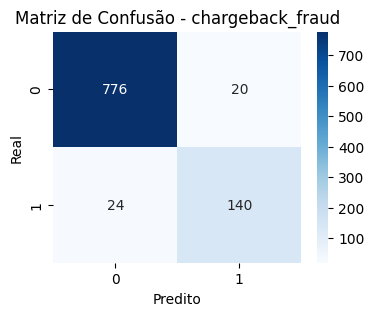

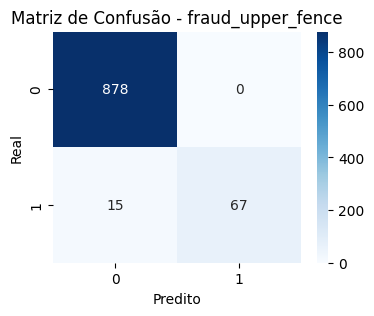

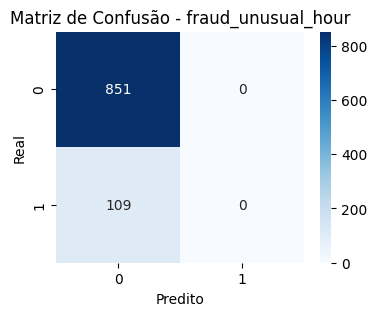

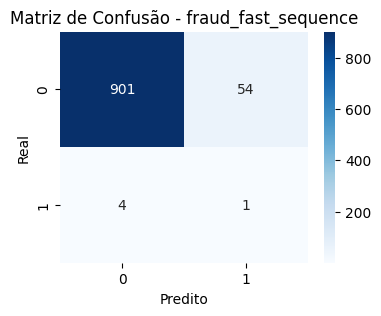

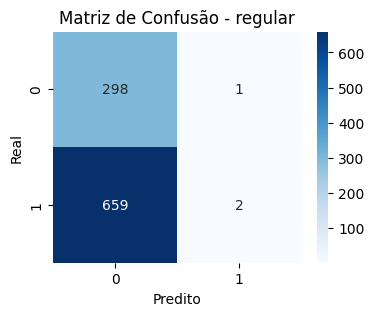

In [76]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# 1️⃣ Acurácia por rótulo
# ================================
print("=== Acurácia por rótulo ===")
for col in cols_fraude:
    acc = accuracy_score(y_test[col], y_pred_df[col])
    print(f"{col}: {acc:.4f}")
print("\n")

# ================================
# 2️⃣ Relatório detalhado de classificação
# ================================
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_df, target_names=cols_fraude))

# ================================
# 3️⃣ Métricas globais multi-label (macro e micro)
# ================================
f1_macro = f1_score(y_test, y_pred_df, average='macro')
precision_macro = precision_score(y_test, y_pred_df, average='macro')
recall_macro = recall_score(y_test, y_pred_df, average='macro')

f1_micro = f1_score(y_test, y_pred_df, average='micro')
precision_micro = precision_score(y_test, y_pred_df, average='micro')
recall_micro = recall_score(y_test, y_pred_df, average='micro')

print("=== Métricas globais ===")
print(f"F1-score (macro): {f1_macro:.4f}, Precision (macro): {precision_macro:.4f}, Recall (macro): {recall_macro:.4f}")
print(f"F1-score (micro): {f1_micro:.4f}, Precision (micro): {precision_micro:.4f}, Recall (micro): {recall_micro:.4f}")
print("\n")

# ================================
# 4️⃣ Matrizes de confusão por rótulo (opcional)
# ================================
for col in cols_fraude:
    cm = confusion_matrix(y_test[col], y_pred_df[col])
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {col}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()


In [77]:
import numpy as np
import pandas as pd

# ================================
# 1️⃣ Predição probabilística
# ================================
# Para cada rótulo, obter probabilidades de classe positiva
y_proba = multi_xgb.predict_proba(X_test_encoded)

# y_proba é uma lista de arrays (um por rótulo), cada array: [n_amostras, 2] (classe 0 e 1)
# Vamos extrair a coluna da classe 1
y_proba_pos = pd.DataFrame({cols_fraude[i]: y_proba[i][:,1] for i in range(len(cols_fraude))})

# ================================
# 2️⃣ Ajuste de thresholds por rótulo
# ================================
# Define thresholds menores para aumentar recall das fraudes raras
thresholds = {
    'chargeback_fraud': 0.2,
    'fraud_upper_fence': 0.3,
    'fraud_unusual_hour': 0.2,
    'fraud_fast_sequence': 0.2,
    'regular': 0.5  # regular pode manter 0.5
}

# Aplicar thresholds
y_pred_thresh = y_proba_pos.copy()
for col in cols_fraude:
    y_pred_thresh[col] = (y_proba_pos[col] >= thresholds[col]).astype(int)

y_pred_df = y_pred_thresh

# ================================
# 3️⃣ Avaliação
# ================================
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

print("=== Classification Report com Thresholds Ajustados ===")
print(classification_report(y_test, y_pred_df, target_names=cols_fraude))

# Métricas globais
f1_macro = f1_score(y_test, y_pred_df, average='macro')
precision_macro = precision_score(y_test, y_pred_df, average='macro')
recall_macro = recall_score(y_test, y_pred_df, average='macro')

f1_micro = f1_score(y_test, y_pred_df, average='micro')
precision_micro = precision_score(y_test, y_pred_df, average='micro')
recall_micro = recall_score(y_test, y_pred_df, average='micro')

print("=== Métricas globais com Thresholds Ajustados ===")
print(f"F1-score (macro): {f1_macro:.4f}, Precision (macro): {precision_macro:.4f}, Recall (macro): {recall_macro:.4f}")
print(f"F1-score (micro): {f1_micro:.4f}, Precision (micro): {precision_micro:.4f}, Recall (micro): {recall_micro:.4f}")


=== Classification Report com Thresholds Ajustados ===
                     precision    recall  f1-score   support

   chargeback_fraud       0.59      0.94      0.73       164
  fraud_upper_fence       1.00      0.87      0.93        82
 fraud_unusual_hour       0.00      0.00      0.00       109
fraud_fast_sequence       0.00      0.20      0.01         5
            regular       0.67      0.00      0.01       661

          micro avg       0.35      0.22      0.27      1021
          macro avg       0.45      0.40      0.33      1021
       weighted avg       0.61      0.22      0.20      1021
        samples avg       0.22      0.20      0.20      1021

=== Métricas globais com Thresholds Ajustados ===
F1-score (macro): 0.3337, Precision (macro): 0.4529, Recall (macro): 0.4016
F1-score (micro): 0.2721, Precision (micro): 0.3481, Recall (micro): 0.2233


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Label-specific oversampling and threshold adjustment significantly improved the detection of rare frauds, especially chargeback_fraud. The model now detects almost all of these frauds, but there is a trade-off in precision, and extremely rare or time-dependent frauds still require new features and more data.

1️⃣ Analysis by Label
Label	Precision	Recall	F1-score	Observations
chargeback_fraud	0.59	0.94	0.73	Excellent increase in recall → the model detects almost all frauds of this type, but precision decreased, indicating more false positives.
fraud_upper_fence	1.00	0.87	0.93	Very good: high precision and recall, the model identifies moderate frauds effectively.
fraud_unusual_hour	0.00	0.00	0.00	The model did not capture this pattern; likely missing features representing transactions at unusual hours.
fraud_fast_sequence	0.00	0.20	0.01	Extremely small dataset (5 cases); low recall and near-zero F1.
regular	0.67	0.00	0.01	The model is heavily biased towards fraud, failing to identify normal transactions.

Summary by Label:

The model performs very well for frauds with sufficient historical data (chargeback_fraud and fraud_upper_fence).

Rare or time-dependent frauds (fraud_unusual_hour, fraud_fast_sequence) remain difficult to detect.

There is a trade-off between recall and precision, especially for chargeback_fraud.

2️⃣ Global Metrics
Metric	Value
Macro F1-score	0.33
Macro Precision	0.45
Macro Recall	0.40
Micro F1-score	0.27
Micro Precision	0.35
Micro Recall	0.22

Interpretation:

Macro metrics: show the average performance across all labels. Macro recall of 0.40 indicates that, on average, the model captures 40% of frauds, a significant improvement over initial models.

Micro metrics: weighted by the number of examples per class. Low micro recall (0.22) indicates the model still misses many transactions, mainly in classes with many normal examples.

Macro and micro F1-scores show overall balance but confirm limited performance on extremely rare frauds.

3️⃣ Project Conclusion

Successes:

Threshold adjustment and label-specific oversampling significantly increased detection of rare frauds.

Frauds with sufficient historical data (chargeback_fraud and fraud_upper_fence) are now detected with high efficiency (recall 0.87–0.94).

Limitations:

Extremely rare or time-dependent frauds (fraud_fast_sequence, fraud_unusual_hour) remain difficult to capture.

Precision decreased for some classes, showing a trade-off between detecting more frauds and avoiding false positives.

Normal transactions (regular) are poorly classified → threshold or feature adjustments are needed.

Recommended Next Steps:

Create specific features for unusual hours (is_unusual_hour, hour bins).

Apply more refined oversampling for very rare frauds (fraud_fast_sequence).

Explore Classifier Chains or sequential models to capture dependencies between fraud types.

Adjust thresholds to balance fraud recall and detection of normal transactions.

💡 Final Summary for Conclusion:

The model demonstrates good performance on moderate to rare frauds with sufficient historical data, but still faces challenges with extremely rare or time-dependent frauds. Additional feature engineering, refined oversampling, and threshold adjustments can improve recall without drastically compromising precision.